In [2]:
import pandas as pd
import numpy as np
import os 
import re # Regular Expressions library
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

# ======== UPLOAD DATA ======
subject_num = '08'

raw_data = pd.read_csv(
    r"C:\Users\dzh0063\OneDrive - Auburn University\Documents\Guest Lecture\dss_demo\EMG_data_for_gestures-master\08\1_raw_data_12-14_23.03.16.txt")
raw_file = open(r"C:\Users\dzh0063\OneDrive - Auburn University\Documents\Guest Lecture\dss_demo\EMG_data_for_gestures-master\08\1_raw_data_12-14_23.03.16.txt","r")

data = raw_file.readlines()

# ======= PRE PROCESS FEATURES COLUMNS ========
data = [col.split('\t') for col in data]
data[1:] # Capture data and dismiss header info
data_df = pd.DataFrame(data)
columns = data[0]
data_df.columns = columns
feature_columns = columns[1:-1]

# Remove "\n" in the final column
def cleaner(txt):
    txt = re.sub(r'[\n]+','', txt)
    return txt
# Apply cleaner function to last column header
data_df = data_df.rename(columns = {'class\n' : 'class'} )
# Apply cleaner function to last column values 
data_df['class'] = data_df['class'].apply(lambda p: cleaner(p))
data_df = data_df.iloc[1:] # Remove first header row
data_df = data_df.astype(str).astype(float)

# Remove Rest Class
data_df = data_df[data_df['class'] != 0]

# Format Data: Split into attrubutes and class labels
X = data_df.iloc[1:,:-1]
y = data_df['class']
time = data_df.iloc[:, 0]

# Feature scaling using z-scale transformation (+- 1 stdev)
X = abs(X)
X_scaled = preprocessing.StandardScaler().fit_transform(X)
y = y.iloc[:-1]

In [5]:
# =================== TEST ALGORITHMS ===================
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

from sklearn.metrics import confusion_matrix as cm
import seaborn as sns

# Split 80 percent training and 20 percent for testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state=0)

lda = LDA(n_components = 5) # number of linear discriminants (n=1 for a single linear discriminant)
lda.fit_transform(X_train, y_train)
lda_pred = lda.predict(X_test)

# PCA 
pca = PCA(n_components = 5)
pca.fit(X_train)
print("PCA explained variance: ", pca.explained_variance_ratio_)
print('LDA explained variance: ', lda.explained_variance_ratio_)

# Transformed training and testing 
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# ------ Test Random Forest ------------
# n_estimators parameter defines the number of trees in the random fores
max_depth=13
classifier_randomforest = RandomForestClassifier(n_estimators = 10, random_state = 0, max_depth=max_depth)
classifier_randomforest.fit(X_train, y_train)
randomforest_pred = classifier_randomforest.predict(X_test)

# ------ Test SVM -------------
# C = 100000
# clf = svm.SVC(decision_function_shape='ovo', C=C)
# clf.fit(X_train, y_train)
# svm_pred = clf.predict(X_test)

lda_accuracy = round(accuracy_score(y_test, lda_pred),3)
rf_accuracy = round(accuracy_score(y_test, randomforest_pred),3)
# svm_accuracy = round(accuracy_score(y_test, svm_pred),3)

# ACCURACY PERFORMANCE
print('Accuracy using LDA: ' + str(lda_accuracy))
print('Accuracy using Random Forest Classifier: ' + str(rf_accuracy))
# print('Accuracy using SVM: '+ str(svm_accuracy))

PCA explained variance:  [0.31957567 0.17251349 0.12480619 0.09374345 0.07032852]
LDA explained variance:  [0.3832408  0.36106997 0.18141691 0.05038353 0.0238888 ]
Accuracy using LDA: 0.668
Accuracy using Random Forest Classifier: 0.988


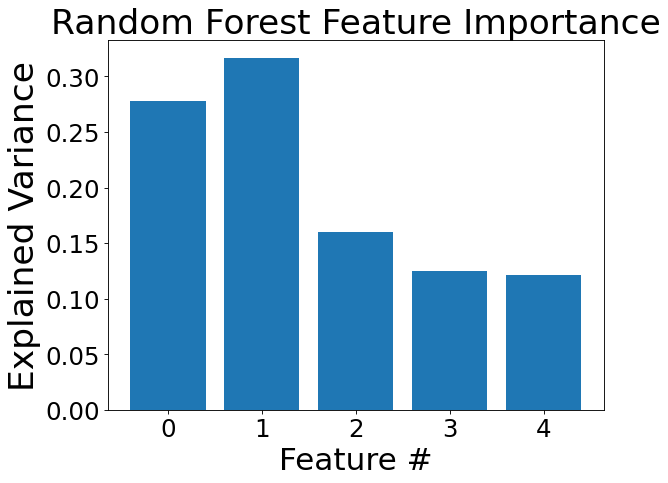

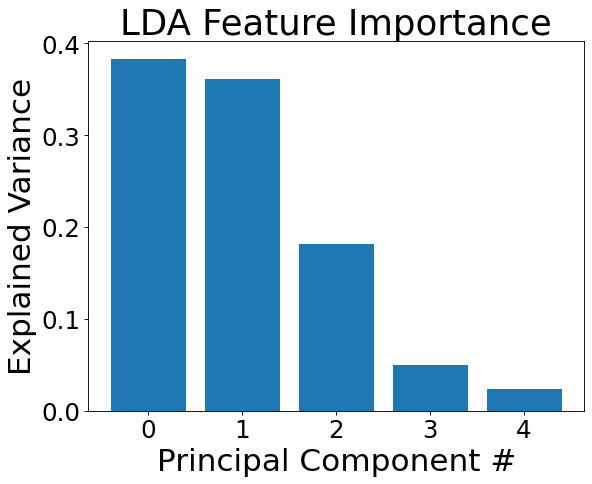

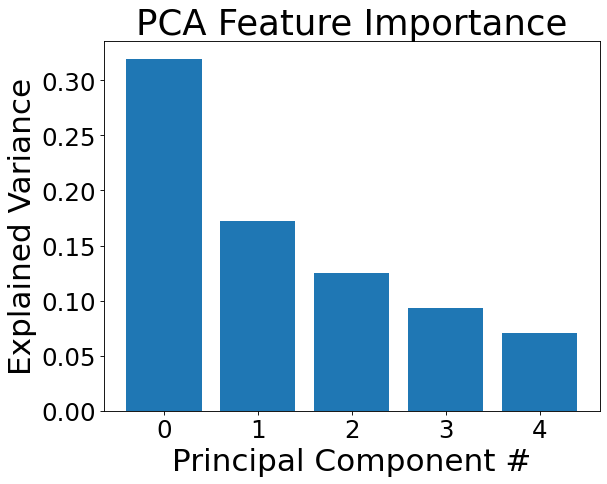

In [7]:
# =======Plot feature importance ========
from matplotlib import pyplot
from matplotlib.pyplot import figure
rf_importance = classifier_randomforest.feature_importances_
lda_importance = lda.explained_variance_ratio_
pca_importance = pca.explained_variance_ratio_
  
# === Random Forest Importance ======
figure(figsize=(8, 6), dpi=80)
plt.rc('font', size=22)          
plt.title('Random Forest Feature Importance', fontsize = 31)
plt.xlabel('Feature #', fontsize=28)
plt.ylabel('Explained Variance', fontsize = 31)
pyplot.bar([x for x in range(len(rf_importance))], rf_importance)
pyplot.show()

# === LDA Importance ======
figure(figsize=(8, 6), dpi=80)
plt.rc('font', size=22)          
plt.title('LDA Feature Importance', fontsize = 32)
plt.xlabel('Principal Component #', fontsize=28)
plt.ylabel('Explained Variance', fontsize = 28)
pyplot.bar([x for x in range(len(lda_importance))], lda_importance)
pyplot.show()
figure(figsize=(8, 6), dpi=80)

# ===== PCA Importance =====
plt.rc('font', size=22)          
plt.title('PCA Feature Importance', fontsize = 32)
plt.xlabel('Principal Component #', fontsize=28)
plt.ylabel('Explained Variance', fontsize = 28)
pyplot.bar([x for x in range(len(pca_importance))], pca_importance)
pyplot.show()

In [16]:
# =================== EVALUATE ALGORITHMS ===================
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report

classes = ['Clenched', 'Wrist Flexion', 'Wrist Extension', 'Radial Deviation', 'Ulnar Deviation', 'Extended Palm']

randomforest_report = classification_report(y_test, randomforest_pred, output_dict=True, digits=3, target_names = classes)
randomforest_report_df = pd.DataFrame(randomforest_report).transpose()

# svm_report = classification_report(y_test, svm_pred, output_dict=True, digits=3, target_names = classes)
# svm_report_df = pd.DataFrame(svm_report).transpose()

lda_report = classification_report(y_test, lda_pred, output_dict=True, digits=3, target_names = classes)
lda_report_df = pd.DataFrame(lda_report).transpose()
randomforest_report_df
# Export classification report to a csv 
# randomforest_report_df.to_csv(r'C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\Results\Classification_Report_RF_Baseline'+ str(subject_num)+ '.csv')
# svm_report_df.to_csv(r'C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\Results\Classification_Report_SVM_Baseline'+ str(subject_num)+ '.csv')
# lda_report_df.to_csv(r'C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\Results\Classification_Report_LDA_Baseline'+ str(subject_num)+ '.csv')

,precision,recall,f1-score,support
Clenched,0.998308,1.000000,0.999153,590.000000
Wrist Flexion,0.991379,0.988539,0.989957,698.000000
Wrist Extension,0.988391,0.988391,0.988391,603.000000
Radial Deviation,0.981387,0.981387,0.981387,591.000000
Ulnar Deviation,0.984756,0.983257,0.984006,657.000000
Extended Palm,0.983361,0.986644,0.985000,599.000000
accuracy,0.987961,0.987961,0.987961,0.987961
macro avg,0.987931,0.988037,0.987983,3738.000000
weighted avg,0.987962,0.987961,0.987961,3738.000000


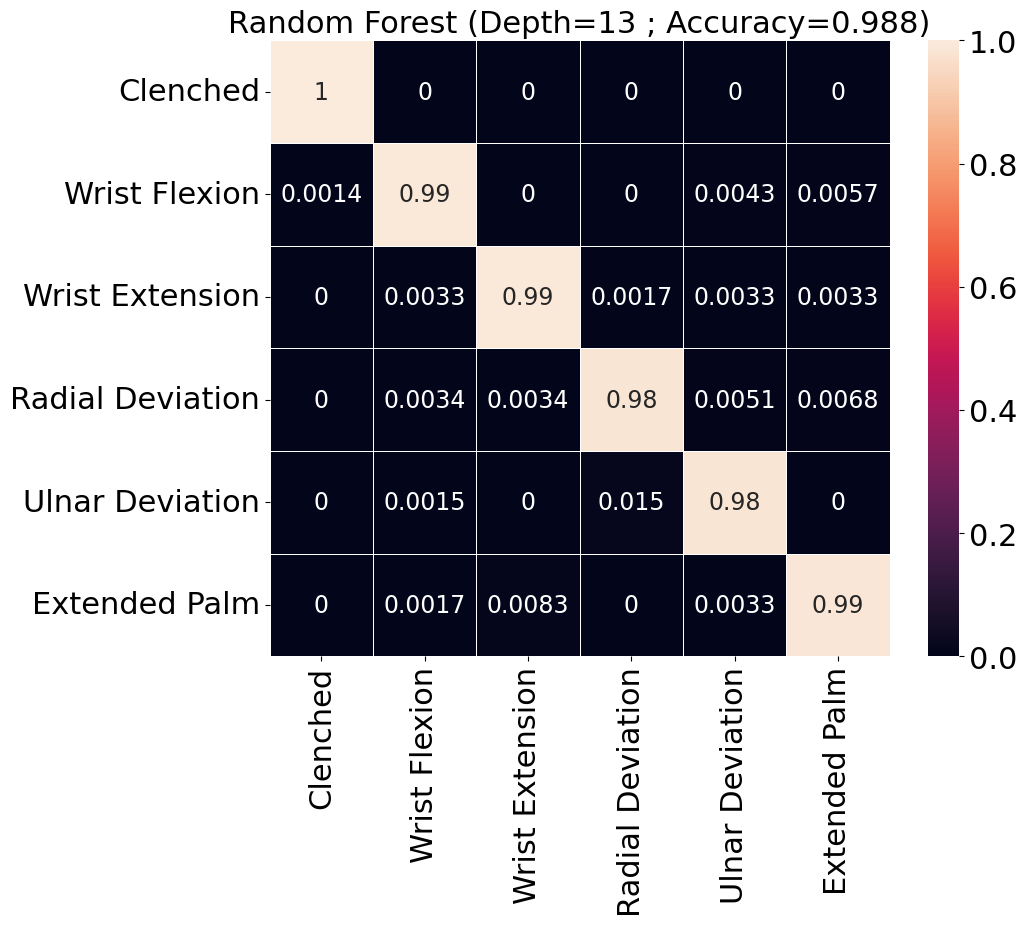

<Figure size 640x480 with 0 Axes>

In [13]:
#  =================== PLOT CONFUSION MATRICES ===================
from sklearn.metrics import confusion_matrix
import seaborn as sns

classes = ['Clenched', 'Wrist Flexion', 'Wrist Extension', 'Radial Deviation', 'Ulnar Deviation', 'Extended Palm']

# ---------------------------------------
# Random Forest - Confusion Matrix ---------------
fig, ax = plt.subplots(figsize=(10,8))         # Sample figsize in inches
cm_rf = confusion_matrix(y_test, randomforest_pred)
np.set_printoptions(precision=2)
cm_norm_rf = cm_rf.astype('float')/cm_rf.sum(axis=1)[:,np.newaxis]
plt.figure()

x_axis_labels = classes
y_axis_labels = classes
heatmap = sns.heatmap(cm_norm_rf, annot=True, annot_kws={"size":17},linewidths=.5, ax=ax, xticklabels=x_axis_labels, yticklabels=y_axis_labels)
ax.set_title('Random Forest (Depth=' + str(max_depth) + ' ; Accuracy=' +str(rf_accuracy) + ')', fontsize = 22) 
plt.show()

### Visualize ONE of the decision trees of the Random Forest

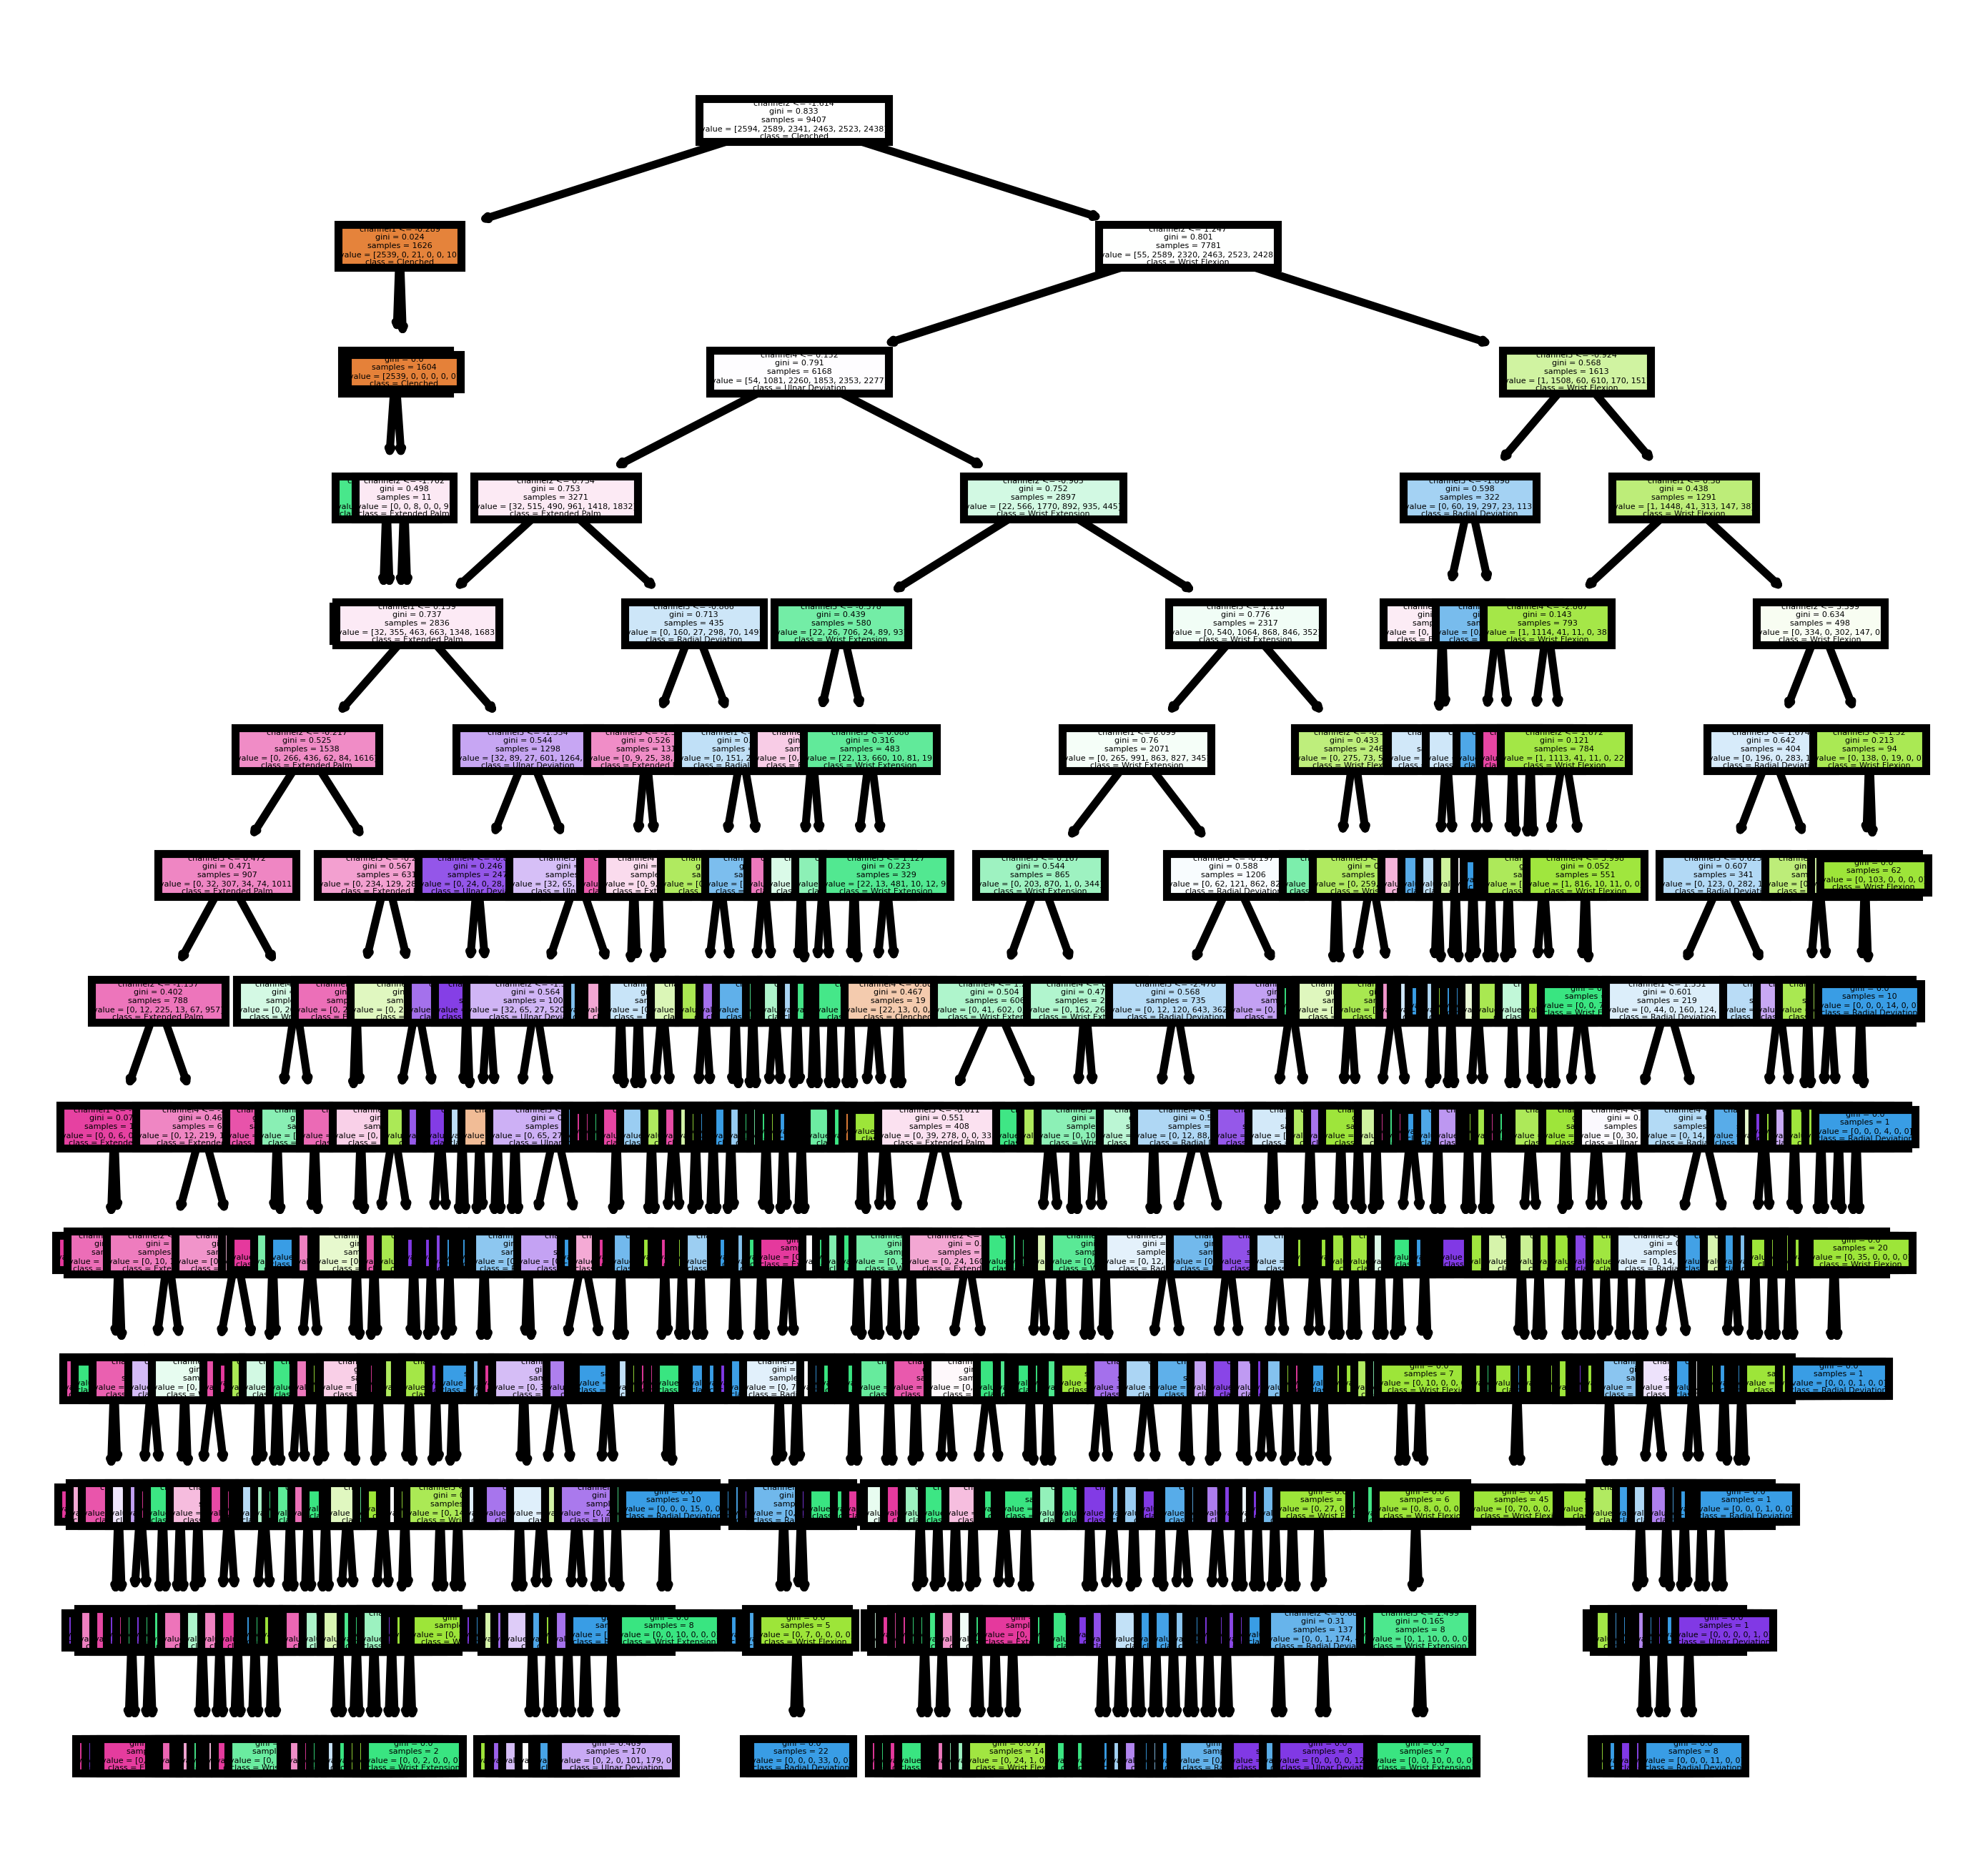

In [22]:
from sklearn import tree

fn=X.columns[1:]
cn=classes

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(classifier_randomforest.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# fig.savefig('rf_individualtree.png')

In [25]:
classifier_randomforest.estimators_

[DecisionTreeClassifier(max_depth=13, max_features='sqrt',
                        random_state=209652396),
 DecisionTreeClassifier(max_depth=13, max_features='sqrt',
                        random_state=398764591),
 DecisionTreeClassifier(max_depth=13, max_features='sqrt',
                        random_state=924231285),
 DecisionTreeClassifier(max_depth=13, max_features='sqrt',
                        random_state=1478610112),
 DecisionTreeClassifier(max_depth=13, max_features='sqrt',
                        random_state=441365315),
 DecisionTreeClassifier(max_depth=13, max_features='sqrt',
                        random_state=1537364731),
 DecisionTreeClassifier(max_depth=13, max_features='sqrt',
                        random_state=192771779),
 DecisionTreeClassifier(max_depth=13, max_features='sqrt',
                        random_state=1491434855),
 DecisionTreeClassifier(max_depth=13, max_features='sqrt',
                        random_state=1819583497),
 DecisionTreeClassifier(

In [ ]:
# ======= Visualize Random Forest and Export to a png ======
from sklearn.tree import export_graphviz
import pydot
from graphviz import Source
from sklearn import tree

tree = classifier_randomforest.estimators_[5]
export_graphviz(tree, out_file = r'C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\Results\tree.dot')
(graph, ) = pydot.graph_from_dot_file(r'C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\Results\tree.dot')
graph.write_png(r'C:\Users\dholl\OneDrive\Documents\COMP 6630\Final Project\Results\tree_depth=1.png');


In [ ]:
# ===== Plot validation curve for SVM =============

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

#X, y = load_digits(return_X_y=True)

param_range = np.logspace(-6, 10, 16)
train_scores, test_scores = validation_curve(
    SVC(), X_train, y_train, param_name="gamma", param_range=param_range,
    scoring="accuracy", n_jobs=1)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

figure(figsize=(8, 6), dpi=80)

plt.title("Validation Curve with SVM", FontSize = 28)
plt.xlabel(r"$\gamma$", FontSize = 18)
plt.ylabel("Score", FontSize = 18)
plt.ylim(0.0, 1.1)
lw = 2
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="blue", lw=lw)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="blue", lw=lw)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="green", lw=lw)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="green", lw=lw)
plt.legend(loc="best")
plt.show()
figure(figsize=(8, 6), dpi=80)